## Alternative assignment

Here you can find an alternative assignment notebook which does not require py2 or a physical screen.

For starters, please go to __qlearning.py__ file in the current folder and implement q-learning agent by following instructions in the file.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

'bash' is not recognized as an internal or external command,
operable program or batch file.


env: DISPLAY=:1


### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [3]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2017-09-03 23:37:56,007] Making new env: Taxi-v2


In [3]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [4]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        next_s,r,done,_ = env.step(a)
        
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward
    
        
    

0.04059802359226594


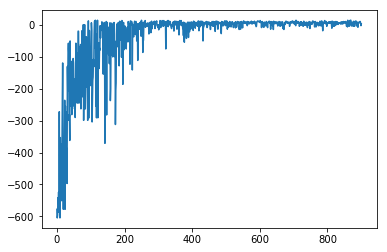

In [5]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    
    agent.epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        print(agent.epsilon)
        plt.plot(rewards)
        plt.show()
        

# Main assignment

Use agent to train efficiently on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

[2017-09-04 00:47:08,246] Making new env: CartPole-v0


first state:[ 0.01091249  0.03506909  0.02662161 -0.03933311]


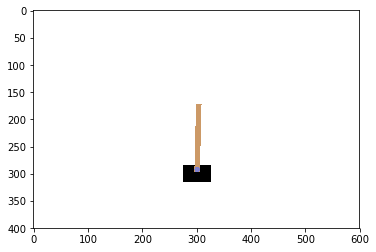

In [125]:
#run xvfb and set %env DISPLAY=:1 if in binder or on a server
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
plt.imshow(env.render('rgb_array'))

In [129]:
n_digits = 400
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [130]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        s = [round(decimal.Decimal(i),2) for i in s]
        s = tuple(s)
        a = agent.getAction(s)
        next_s,r,done,_ = env.step(a)
        next_s = [round(decimal.Decimal(i),2) for i in next_s]
        next_s = tuple(next_s)
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward

0.04059802359226594


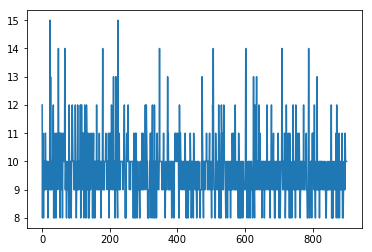

In [131]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    
    agent.epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        print(agent.epsilon)
        plt.plot(rewards)
        plt.show()